In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import matrix_rank
from scipy.optimize import linprog # for LP
import datetime
import math
from scipy.sparse import rand
from scipy.optimize import lsq_linear
from IPython.display import display, Latex # for output compilation
#specify that all columns should be shown
pd.set_option('display.max_rows', None)

$$ \left\{\begin{matrix} 
a_{11} x_1 + a_{12} x_2 + ... +a_{n1} x_n = b_1\\ 
a_{21} x_1 + a_{22} x_2 + ... +a_{21} x_n = b_2\\ 
...\\
a_{m1} x_1 + a_{m2} x_2 + ... +a_{m1} x_n = b_m\\
\end{matrix}\right .$$



$$ A = \begin{bmatrix}a_{11} & \cdots & a_{1n} \\ \vdots & \ddots & \vdots \\ a_{m1} & \cdots & a_{mn}\end{bmatrix}, \ x = \begin{bmatrix}x_1 \\ \vdots \\ x_n\end{bmatrix}, \ B =\begin{bmatrix}b_1 \\ \vdots \\ b_n\end{bmatrix} $$

$$ Ax = b $$

$$x_j > 0$$

$$x = \alpha x + \beta $$
$$x^{(k+1)} = \alpha x^{(k)} + \beta $$
$$x^{(k+1)} = \alpha x^{(k)} + \beta $$
$$ \left \| x^{(k+1)} - x^{(k)} \right \|< \varepsilon \rightarrow min$$

### Read initial data

In [2]:
path_to_preprocessed = 'Data/Schöpfleuthnergasse/Preprocessed data/'

In [3]:
A_df = pd.read_csv(path_to_preprocessed + 'A_matrix_only_concrete.csv')
b_df = pd.read_csv(path_to_preprocessed + 'b_vector_only_concrete.csv')

In [4]:
b = np.array(b_df.betrag, dtype = float)
A = np.array(A_df, dtype = float, order='C')

In [5]:
## We can define constrains for prices( can be taken from supplier/fin.report???)
lb = 10
ub = lb + 100

In [27]:
res = lsq_linear(A, b, bounds=(lb, ub), lsmr_tol='auto', method = 'trf',lsq_solver = 'lsmr', verbose=2, max_iter = 1000)
res

   Iteration        Cost      Cost reduction    Step norm     Optimality   
       0         2.6078e+09                                    3.03e+09    
       1         1.4573e+09      1.15e+09       4.41e+01       6.93e+08    
       2         1.1880e+09      2.69e+08       2.44e+01       1.67e+08    
       3         1.0117e+09      1.76e+08       2.84e+01       1.21e+08    
       4         9.1756e+08      9.42e+07       1.98e+01       7.59e+07    
       5         8.4068e+08      7.69e+07       2.03e+01       6.30e+07    
       6         8.2145e+08      1.92e+07       6.95e+00       4.14e+07    
       7         7.8824e+08      3.32e+07       1.28e+01       3.96e+07    
       8         7.8437e+08      3.87e+06       2.06e+00       2.65e+07    
       9         7.4124e+08      4.31e+07       2.19e+01       1.39e+07    
      10         7.3952e+08      1.72e+06       1.33e+00       1.31e+07    
      11         7.3871e+08      8.09e+05       6.18e-01       1.23e+07    
      12    

       message: The maximum number of iterations is exceeded.
       success: False
        status: 0
           fun: [ 7.028e+03 -6.036e+03 ...  4.936e+02  8.339e+02]
             x: [ 1.000e+01  7.427e+01 ...  6.505e+01  1.003e+01]
           nit: 1000
          cost: 685671534.9401436
    optimality: 7418.564380849258
   active_mask: [-1  0 ...  0  0]
 unbounded_sol: (array([ 3.137e+02, -6.561e+01, ..., -7.395e+01,  6.224e+02]), 7, 14, 18718.050511003574, 2355.3473648778986, 1991.966859688393, 293.3281616518857, 10742.571077536693)

In [28]:
XXs = pd.DataFrame(res['x'], columns = ['x_i'])
fun = pd.DataFrame(res['fun'], columns = ['res'])

<Axes: >

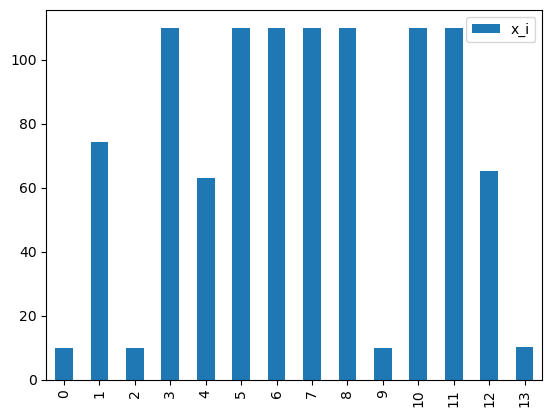

In [29]:
XXs.plot.bar()

<Axes: >

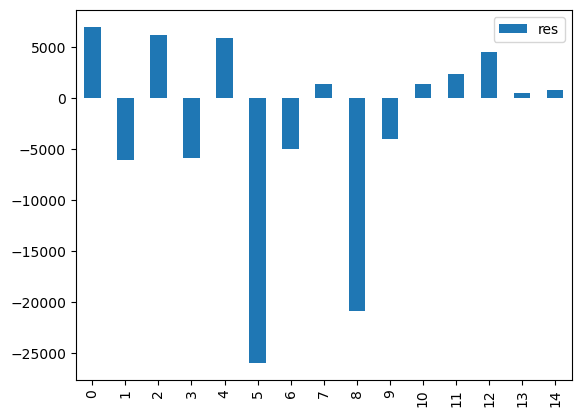

In [30]:
fun.plot.bar()

In [31]:
str_latex = '+'.join( str(round(XXs.x_i.iloc[i],3)) +'x_{' + str(i+1) + '}' for i in range(XXs['x_i'].shape[0]))

In [32]:
display(Latex('$$f(x)=' + str_latex + '$$'))

<IPython.core.display.Latex object>